Q1: Removing Salt Noise Using a Non-Linear Filter
Best Filter: Min Filter (Minimum Filter)

    The Min filter replaces each pixel with the minimum value in its neighborhood.
    Why? Salt noise appears as bright white pixels (high intensity). The min filter eliminates salt noise by replacing white pixels with darker values from their surroundings.

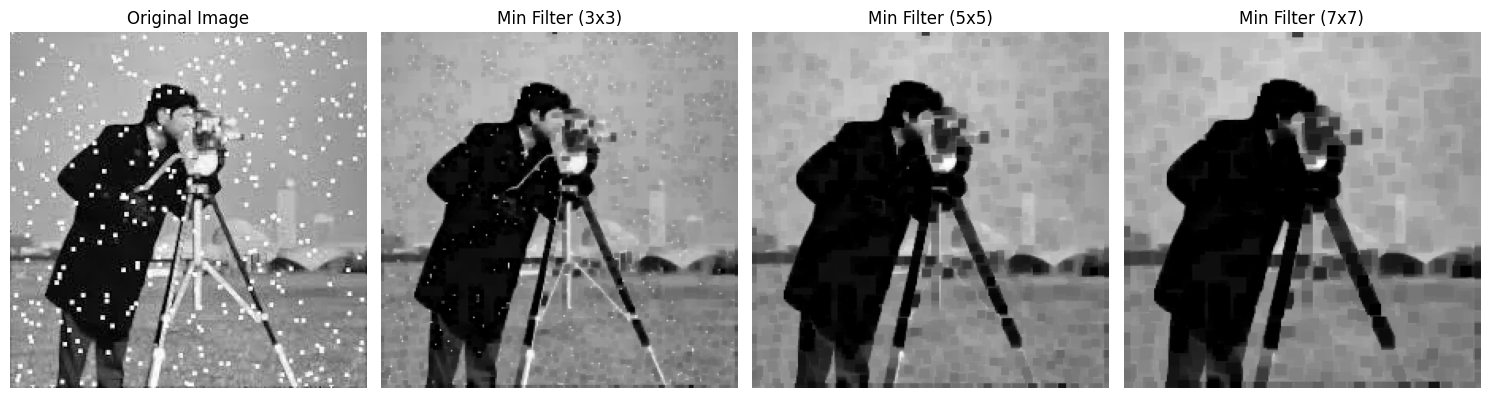

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image = cv2.imread('saltnoise.jpg', cv2.IMREAD_GRAYSCALE)

# Built-in function using OpenCV
def min_filter_builtin(image, ksize):
    return cv2.erode(image, np.ones((ksize, ksize), np.uint8))

# User-defined function for Min filter
def min_filter(image, ksize):
    padded_image = cv2.copyMakeBorder(image, ksize//2, ksize//2, ksize//2, ksize//2, cv2.BORDER_REPLICATE)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.min(padded_image[i:i+ksize, j:j+ksize])

    return output

# Apply with different kernel sizes
min_3x3 = min_filter(image, 3)
min_5x5 = min_filter(image, 5)
min_7x7 = min_filter(image, 7)

# Save results
cv2.imwrite('min_filter_3x3.jpg', min_3x3)
cv2.imwrite('min_filter_5x5.jpg', min_5x5)
cv2.imwrite('min_filter_7x7.jpg', min_7x7)

# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(min_3x3, cmap='gray')
axes[1].set_title("Min Filter (3x3)")
axes[1].axis("off")

axes[2].imshow(min_5x5, cmap='gray')
axes[2].set_title("Min Filter (5x5)")
axes[2].axis("off")

axes[3].imshow(min_7x7, cmap='gray')
axes[3].set_title("Min Filter (7x7)")
axes[3].axis("off")

plt.tight_layout()
plt.show()

Why is this better than a linear filter?

    A linear filter (e.g., averaging) would blur the entire image.
    The min filter specifically targets high-intensity noise without affecting normal pixels.

Q2: Removing Pepper Noise Using a Non-Linear Filter
Best Filter: Max Filter (Maximum Filter)

    The Max filter replaces each pixel with the maximum value in its neighborhood.
    Why? Pepper noise appears as black pixels (low intensity). The max filter eliminates them by replacing black pixels with brighter values from the surroundings.

In [3]:
# Load the noisy image
image = cv2.imread('peppernoise.jpg', cv2.IMREAD_GRAYSCALE)

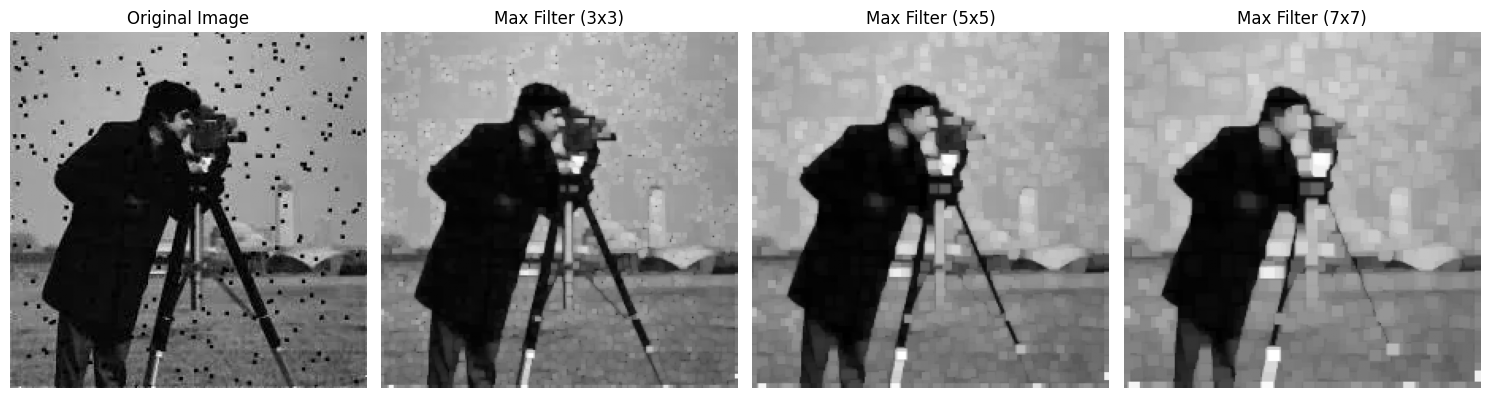

In [4]:
# Built-in function using OpenCV
def max_filter_builtin(image, ksize):
    return cv2.dilate(image, np.ones((ksize, ksize), np.uint8))

# User-defined function for Max filter
def max_filter(image, ksize):
    padded_image = cv2.copyMakeBorder(image, ksize//2, ksize//2, ksize//2, ksize//2, cv2.BORDER_REPLICATE)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.max(padded_image[i:i+ksize, j:j+ksize])

    return output

# Apply with different kernel sizes
max_3x3 = max_filter(image, 3)
max_5x5 = max_filter(image, 5)
max_7x7 = max_filter(image, 7)

# Save results
cv2.imwrite('max_filter_3x3.jpg', max_3x3)
cv2.imwrite('max_filter_5x5.jpg', max_5x5)
cv2.imwrite('max_filter_7x7.jpg', max_7x7)

# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(max_3x3, cmap='gray')
axes[1].set_title("Max Filter (3x3)")
axes[1].axis("off")

axes[2].imshow(max_5x5, cmap='gray')
axes[2].set_title("Max Filter (5x5)")
axes[2].axis("off")

axes[3].imshow(max_7x7, cmap='gray')
axes[3].set_title("Max Filter (7x7)")
axes[3].axis("off")

plt.tight_layout()
plt.show()


Why is this better than a linear filter?

    A linear filter like averaging would blur important details.
    The max filter specifically enhances dark regions without affecting other pixels.

Q3: Removing Both Salt & Pepper Noise Using a Non-Linear Filter
Best Filter: Median Filter

    The Median filter replaces each pixel with the median value of its neighborhood.
    Why? It removes both salt (white) and pepper (black) noise while preserving edges.

In [11]:
# Load the noisy image
image = cv2.imread('salt_pepper.png', cv2.IMREAD_GRAYSCALE)

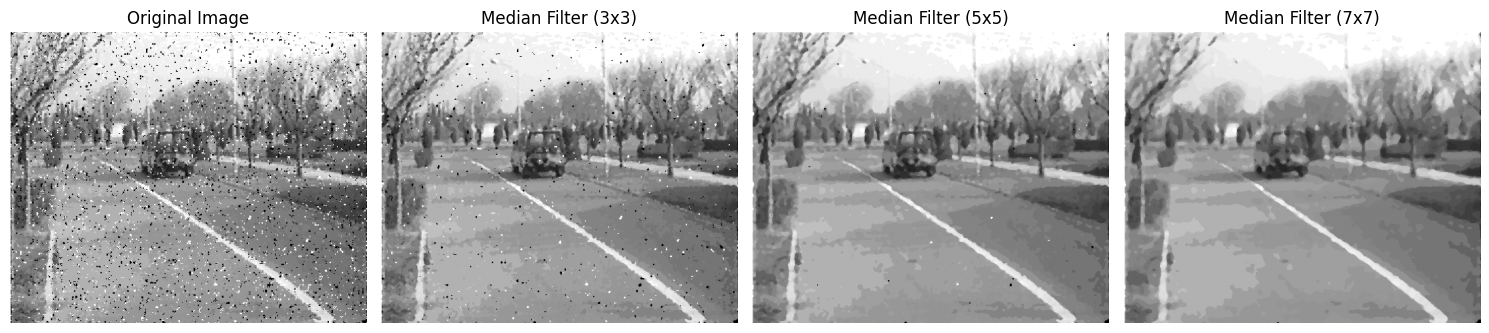

In [13]:
# Built-in function using OpenCV
def median_filter_builtin(image, ksize):
    return cv2.medianBlur(image, ksize)

# User-defined function for Median filter
def median_filter(image, ksize):
    padded_image = cv2.copyMakeBorder(image, ksize//2, ksize//2, ksize//2, ksize//2, cv2.BORDER_REPLICATE)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.median(padded_image[i:i+ksize, j:j+ksize])

    return output

# Apply with different kernel sizes
median_3x3 = median_filter(image, 3)
median_5x5 = median_filter(image, 5)
median_7x7 = median_filter(image, 7)

# Save results
cv2.imwrite('median_filter_3x3.jpg', median_3x3)
cv2.imwrite('median_filter_5x5.jpg', median_5x5)
cv2.imwrite('median_filter_7x7.jpg', median_7x7)

# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(median_3x3, cmap='gray')
axes[1].set_title("Median Filter (3x3)")
axes[1].axis("off")

axes[2].imshow(median_5x5, cmap='gray')
axes[2].set_title("Median Filter (5x5)")
axes[2].axis("off")

axes[3].imshow(median_7x7, cmap='gray')
axes[3].set_title("Median Filter (7x7)")
axes[3].axis("off")

plt.tight_layout()
plt.show()

Why is this better than a linear filter?

    A linear filter blurs edges, but the median filter preserves sharp edges while removing noise.

Q4: Removing Gaussian Noise Using the Mid-Point Filter
Best Filter: Mid-Point Filter

    The Mid-point filter finds the average of the maximum and minimum pixel values in the neighborhood.
    Why? It is effective for Gaussian noise, which has random variations.

In [14]:

# Load the noisy image
image = cv2.imread('imagewithgaussiannoise.png', cv2.IMREAD_GRAYSCALE)

C:\Users\Aspire_Lays\AppData\Local\Temp\ipykernel_6256\2785556729.py:9: RuntimeWarning: overflow encountered in scalar add
  output[i, j] = (np.max(local_region) + np.min(local_region)) // 2  # Mid-point formula


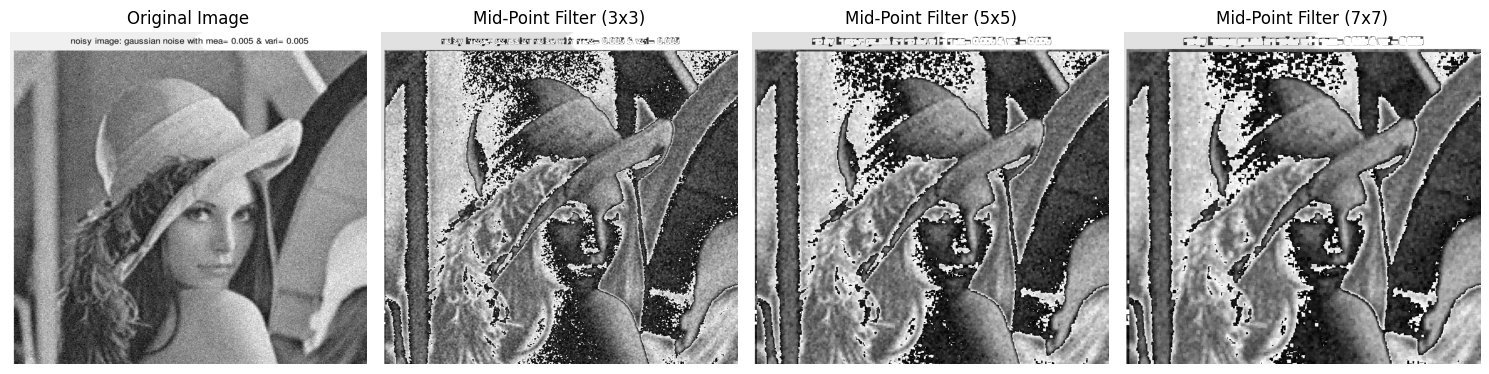

In [ ]:
# User-defined function for Mid-Point filter
def midpoint_filter(image, ksize):
    padded_image = cv2.copyMakeBorder(image, ksize//2, ksize//2, ksize//2, ksize//2, cv2.BORDER_REPLICATE)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            local_region = padded_image[i:i+ksize, j:j+ksize]
            output[i, j] = (np.max(local_region) + np.min(local_region)) // 2  # Mid-point formula

    return output

# Apply with a 3x3 kernel
midpoint_3x3 = midpoint_filter(image, 3)
midpoint_5x5 = midpoint_filter(image, 5)
midpoint_7x7 = midpoint_filter(image, 7)

# Save results
cv2.imwrite('midpoint_filter_3x3.jpg', midpoint_3x3)
cv2.imwrite('midpoint_filter_5x5.jpg', midpoint_5x5)
cv2.imwrite('midpoint_filter_7x7.jpg', midpoint_7x7)
# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(midpoint_3x3, cmap='gray')
axes[1].set_title("Mid-Point Filter (3x3)")
axes[1].axis("off")

axes[2].imshow(midpoint_5x5, cmap='gray')   
axes[2].set_title("Mid-Point Filter (5x5)")
axes[2].axis("off")

axes[3].imshow(midpoint_7x7, cmap='gray')
axes[3].set_title("Mid-Point Filter (7x7)")
axes[3].axis("off")

plt.tight_layout()
plt.show()

Why is this better than a linear filter?

    Linear averaging filters blur the image.
    The mid-point filter removes noise while preserving contrast.